# Επεξεργασία Σήματος

## Σειρές Fourier

Η τριγωνομετρική σειρά Fourier της συνάρτησης f(x) στο διάστημα (a,b) με T = b-a (αντιστοιχεί στην περίοδο, εφόσον η συνάρτηση επεκταθεί περιοδικά) ορίζεται ως:

$$
\frac{a_0}{2} + \sum_{n=1}^{\infty}
(a_n \cos(\frac{2n \pi x}{T}) + b_n \sin(\frac{2n \pi x}{T}))
$$

όπου οι συντελεστές δίνονται από τις σχέσεις:

$$
T = b - a \\ 
a_0 = \frac{2}{T} \int_{a}^{b}{f(x) dx} \\ 
a_n = \frac{2}{T} \int_{a}^{b}{f(x) \cos(\frac{2n \pi x}{T}) dx} \\ 
b_n = \frac{2}{T} \int_{a}^{b}{f(x) \sin(\frac{2n \pi x}{T}) dx}
$$

Η συνηθέστερη μορφή της σειράς Fourier είναι στην περίπτωση περιοδικής συνάρτησης $f$ με περίοδο $Τ$ στο διάστημα $(-Τ/2,Τ/2)$. Επίσης είναι πιο εύκολη η γραφή και κατανόηση των εξισώσεων με χρήση της θεμελιώδους γωνιακής συχνότητας (radian) ω0=2π/Τ (ή της συχνότητας f0=1/T με ω0=2πφ0), ώστε οι συχνότητες να προκύπτουν στα πολλαπλάσια nω (ή nfo) αυτής, στις λεγόμενες αρμονικές. Δηλαδη

$$
x(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty}
(a_n \cos(2\pi n f_0 x) + b_n \sin(2 \pi n f_0 x))
$$

$$
x(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty}
(a_n \cos(n ω_0 x) + b_n \sin(n ω_0 x))
$$

### Παραδείγματα

Υπολογισμός σειράς Fourier της συνάρτησης $f(x)=x^2$

In [1]:
from sympy import fourier_series, pi
from sympy.abc import x
f = x**2
s = fourier_series(f, (x, -pi, pi))
s1 = s.truncate(n=3)
s1

-4*cos(x) + cos(2*x) + pi**2/3

Υπολογισμός της σειράς Fourier της $f(x)=x$:

Η προσέγγιση γίνεται ακριβέστερη όταν περιληφθούν περισσότεροι όροι του αναπτύγματος της σειράς

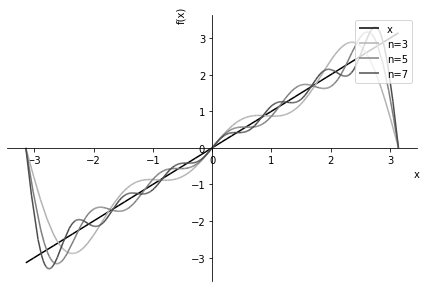

In [2]:
from sympy import fourier_series, pi, plot
from sympy.abc import x
f = x
s = fourier_series(f, (x, -pi, pi))
s1 = s.truncate(n = 3)
s2 = s.truncate(n = 5)
s3 = s.truncate(n = 7)
p = plot(f, s1, s2, s3, (x, -pi, pi), show=False, legend=True)
p[0].line_color = (0, 0, 0)
p[0].label = 'x'
p[1].line_color = (0.7, 0.7, 0.7)
p[1].label = 'n=3'
p[2].line_color = (0.5, 0.5, 0.5)
p[2].label = 'n=5'
p[3].line_color = (0.3, 0.3, 0.3)
p[3].label = 'n=7'
p.show()

Η σειρά Fourier προσεγγίζει τη συνάρτηση στο διάστημα (a,b) και σε όλο το R στην περίπτωση που είναι περιοδική με περίοδο T=L=b-a

Στα ανωτέρω παραδείγματα έγινε χρήση της συνάρτησης fourier_series του πακέτου συμβολικής άλγεβρας sympy. Το πακέτο αυτό περιλαμβάνει πληθώρα συναρτήσεων για συμβολικό υπολογισμό, συμπεριλαμβανομένων ολοκληρωμάτων. Έτσι με βάση τον ορισμό του ανατπύγματος Fourier αυτό μπορεί επίσης να υπολογιστεί με συμβολική ολοκλήρωση. Ένα απλό παράδειγμα συμβολικής ολοκλήρωσης φαίνεται παρακάτω:

In [2]:
from sympy import * 
#init_printing()
x,y = symbols('x y') 
expr=x**2 + x + 1 
res = integrate(expr, x)
res
#display(res)

x**3/3 + x**2/2 + x

Ο συμβολικός υπολογισμός εξυπηρετεί στην περίπτωση που είναι επιθυμητή η εύρεση κλειστού τύπου ενός αποτελέσματος. Ωστόσο είναι αργός και δεν εκμεταλεύεται τις μεθόδους της αριθμητικής ανάλυσης που οδηγεί σε γρηγορότερο, ωστόσο προσεγγιστικό υπολογισμό. Τα ολοκληρώματα στις σειρές Fourier, όπως και κάθε ολοκλήρωμα μπορούν να υπολογιστούν αριθμητικά. Αριθμητικός υπολογισμός είναι ο ακόλουθος:

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
 
# -- define the normalized sine and cosine functions -- 
# -- (Note: these can be replaced by any orthonormal functions!) -- 
 
def fs_sine(k,L): return lambda x: np.sin(2*np.pi*k*x/L)
 
def fs_cosine(k,L): return lambda x: np.cos(2*np.pi*k*x/L)

# -- function operations --
def mult(u,v): return lambda x: u(x)*v(x)
def add(u,v): return lambda x: u(x) + v(x)

#def fourierSeries_coefs(func, xmin, xmax, depth):
    #The period is calculated
def fourierSeries_coefs(func, xmin, xmax, N):
    L = xmax-xmin
        
    a = np.zeros(N+1)
    b = np.zeros(N+1)
    
    wpos = np.linspace(0,N,N+1)*2*np.pi/L
        
    c_plusn = np.zeros(N+1).astype(complex)
    c_minn = np.zeros(N+1).astype(complex)
        
    # -- compute a[0], the constant term in the series --
    a[0] = (2/L)*quad(func ,xmin,xmax)[0]
    c_plusn[0] = a[0]/2
    c_minn[0]=0
        
    # -- compute other coefficients --
    for k in range(1,N+1,1):
        a[k] = (2/L)*quad( mult(func,fs_cosine(k,L)) ,xmin,xmax)[0]
      
    for k in range(1,N+1,1):
        b[k] = (2/L)*quad(mult(func,fs_sine(k,L)),xmin,xmax)[0]
        
    for k in range(1,N+1,1):
        c_plusn[k] = (a[k]-1j*b[k])/2
        c_minn[k] = (a[k]+1j*b[k])/2
        
    reversed_arr = c_minn[::-1];
    comp_coeffs = np.concatenate((reversed_arr[0:N],c_plusn), axis=0)
    
    wneg = wpos[::-1];
    wmega = np.concatenate((-wneg[0:N],wpos), axis=0)
    
        
    return a,b, c_plusn,c_minn, comp_coeffs, wpos, wmega

# -- define the approximate function -- 
def fourier_approx(x, a,b, N, L):
    value = a[0]/2
    for k in range(1,N+1,1):
        value = value + a[k]*fs_cosine(k,L)(x) + b[k]*fs_sine(k,L)(x)
    return(value) 

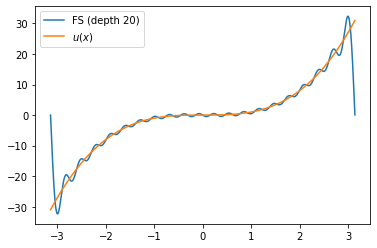

In [2]:
#set the depth and filename here:
depth = 20
filename = "Example.pdf"
 
# -- the function being approximated --
u = lambda x: x**3
 
# -- the domain is [xmin,xmax]
xmin = -np.pi
xmax = np.pi

# calculate the Fourier coefficients
an,bn, cplusn,cminn, cn, wp, w = fourierSeries_coefs(u, xmin, xmax, depth)

# -- plot the original function and the Fourier approximate --
x_values = np.arange(xmin,xmax,0.001)
 
plt.plot(x_values, fourier_approx(x_values, an, bn, depth, xmax-xmin),label="FS (depth %r)" %depth)
plt.plot(x_values, u(x_values),label=r"$u(x)$")
 
plt.legend(loc="upper left")
 
plt.savefig(filename)
# -- if you want to actually see the plot in "real time" --
plt.show()

### Μιγαδική Μορφή

Ο τύπος της σειράς Fourier μπορεί να γραφτεί με τη βοήθεια του τύπου του Euler αντικαθιστώντας το ημίτονο και το συνημίτονο με τις σχέσεις:

$$ \cos \varphi  = \frac{{{e^{i\varphi }} + {e^{ - i\varphi }}}}{2},\;\; \sin \varphi  = \frac{{{e^{i\varphi }} - {e^{ - i\varphi }}}}{{2i}}, $$

Τότε για απλότητα θεωρώντας τη συνάρτηση στο διάστημα (-π, π),  με Τ=2π (οπότε $ω_0=1$), η σειρά Fourier μπορεί να γραφεί ως:

$$
f\left( x \right) = \frac{{{a_0}}}{2} + \sum\limits_{n = 1}^\infty  {\left( {{a_n}\cos nx + {b_n}\sin nx} \right)}  = \frac{{{a_0}}}{2} + \sum\limits_{n = 1}^\infty  {\left( {{a_n}\frac{{{e^{inx}} + {e^{ - inx}}}}{2} + {b_n}\frac{{{e^{inx}} - {e^{ - inx}}}}{{2i}}} \right)}  = \frac{{{a_0}}}{2} + \sum\limits_{n = 1}^\infty  {\frac{{{a_n} - i{b_n}}}{2}{e^{inx}}}  + \sum\limits_{n = 1}^\infty  {\frac{{{a_n} + i{b_n}}}{2}{e^{ - inx}}}  = \sum\limits_{n =  - \infty }^\infty  {{c_n}{e^{inx}}} .
$$

Δηλαδή
$$
f\left( x \right) = \sum\limits_{n =  - \infty }^\infty  {{c_n}{e^{inx}}} .
$$

όπου 
$$
{c_0} = \frac{{{a_0}}}{2},\;\; {c_n} = \frac{{{a_n} - i{b_n}}}{2},\;\; {c_{ - n}} = \frac{{{a_n} + i{b_n}}}{2}.
$$

και η σειρά αναπαριστάται ως ένα άπειρο άθροισμα μιγαδικών εκθετικών συναρτήσεων με μιγαδικούς συντελεστές βαρύτητας που είναι συζυγείς για αντίθετες τιμές του n, και δίνονται από το τύπο:

$$
{c_n} = \frac{1}{{2\pi }}\int\limits_{ - \pi }^\pi  {f\left( x \right){e^{ - inx}}dx} ,\;\; n = 0, \pm 1, \pm 2, \ldots
$$

Σε περίπτωση που όπως αρχικά θεωρούμε τη f στο διάστημα (a,b) με περίοδο Τ, οι τύποι δίνονται από:

$$
f\left( x \right) = \sum\limits_{n =  - \infty }^\infty  {{c_n}{e^{\frac{{2in\pi x}}{Τ}}}} , \\
{c_n} = \frac{1}{{Τ}}\int\limits_{a}^b {f\left( x \right){e^{ - \frac{{2in\pi x}}{Τ}}}dx} ,\;\; n = 0, \pm 1, \pm 2, \ldots
$$

(-20.0, 20.0)

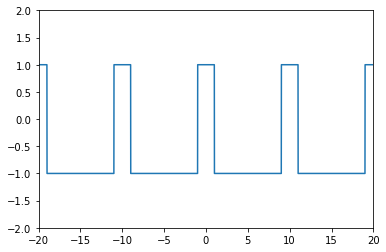

In [4]:
from scipy import signal
T=10
D=2
N=2
shift = 0   # number of cycles to shift (1/4 cycle in your example)
x = np.linspace(-T*N, T*N, 10000, endpoint=False)
y=signal.square(2*np.pi*(1/T)*(x+D/2), D/T)
plt.plot(x,y)
plt.ylim(-2, 2)
plt.xlim(-T*N, T*N)

<ipython-input-1-f0b4f5e15c5f>:36: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  a[k] = (2/L)*quad( mult(func,fs_cosine(k,L)) ,xmin,xmax)[0]


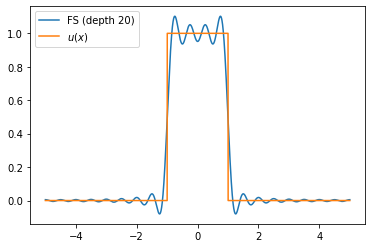

In [5]:
#set the depth and filename here:
depth = 20
filename = "Example.pdf"
 
# -- the function being approximated --
u = lambda x: (1/2)*(signal.square(2*np.pi*(1/T)*(x+D/2), D/T) +1)
 
# -- the domain is [xmin,xmax]
xmin = -T/2
xmax = T/2

# calculate the Fourier coefficients
an,bn, cplusn,cminn, cn, wp, w = fourierSeries_coefs(u, xmin, xmax, depth)

# -- plot the original function and the Fourier approximate --
x_values = np.arange(xmin,xmax,0.001)
 
plt.plot(x_values, fourier_approx(x_values, an, bn, depth, xmax-xmin),label="FS (depth %r)" %depth)
plt.plot(x_values, u(x_values),label=r"$u(x)$")
 
plt.legend(loc="upper left")
 
plt.savefig(filename)
# -- if you want to actually see the plot in "real time" --
plt.show()

c:\python39-32\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\python39-32\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


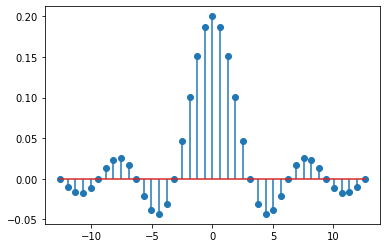

In [6]:
plt.stem(w, cn, use_line_collection = True)
plt.show()

c:\python39-32\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


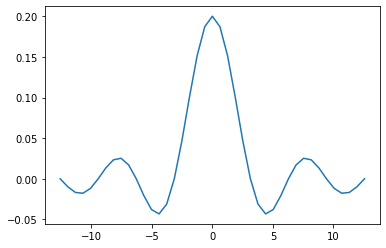

In [7]:
plt.plot(w, cn)
plt.show()

## Μετασχηματισμός Fourier

Οι σειρές Fourier αφορούν την αναπαράσταση ενός περιοδικού σήματος σε ένα διακριτό άθροισμα των τριγωνομετρικών συναρτήσεων βάσης, στις αρμονικές συχνότητες, που διαφέρουν κατά συχνότητα Δω=2p/T ή Δf=1/T. Στην περίπτωση όμως ενός μη περιοδικού σήματος μπορεί να θεωρηθεί ότι η περίοδος τείνει στο άπειρο. Στο όριο αυτό προκύπτει ο μετασχηματισμός Fourier. Ο μετασχηματισμός Fourier είναι ένας ολοκληρωματικός μετασχηματισμός που μετασχηματίζει μια συνάρτηση από το πεδίο του χρόνου στο πεδίο της συχνότητας. Το φάσμα της είναι συνεχές και το άθροισμα της σειράς Fourier γίνεται ολοκλήρωμα. 

Η ευριστική μετάβαση από τη σειρά στο μετασχηματισμό μπορεί να φανεί ξαναγράφοντας τις σχέσεις της σειρας

$$
x\left( t \right) = \sum\limits_{n =  - \infty }^\infty  {{c_n}{e^{\frac{{2in\pi t}}{T}}}} , \\
{c_n} = \frac{1}{{T}}\int\limits_{-T/2}^{T/2} {x\left( t \right){e^{ - \frac{{2in\pi t}}{T}}}dt} ,\;\; n = 0, \pm 1, \pm 2, \ldots
$$

οπότε γράφοντας ως $c_n = c(nΔf)=X(f)$ με $Δf=1/T$ και $nΔf=f$ προκύπτει ότι 

$$
{X(f)} = \int\limits_{-T/2}^{T/2} {x\left( t \right){e^{ - {2i\pi ft}}}dt}Δf ,
$$

οπότε αντικαθιστώντας στο άθροισμα του τύπο για το συντελεστή $c_n$ προκύπτει

$$
x\left( t \right) = \sum\limits_{n =  - \infty }^\infty  {{\int\limits_{-T/2}^{T/2} {x\left( t \right){e^{ - {2i\pi ft}}}dt}  Δf}{e^{{2i\pi ft}}}} 
$$

και ξαναγράφοντας

$$
x\left( t \right) = \sum\limits_{n =  - \infty }^\infty ( {{\int\limits_{-T/2}^{T/2} {x\left( t \right){e^{ - {2i\pi ft}}}dt)  }  }{e^{{2i\pi ft}}}Δf} 
$$

οπότε θεωρώντας $T \rightarrow \infty$, τότε $Δf \rightarrow df$ και το άθροισμα γίνεται ολοκλήρωμα

$$
x\left( t \right) = \int \limits_{- \infty }^\infty ( {{\int\limits_{-\infty}^{\infty} {x\left( t \right){e^{ - {2i\pi ft}}}dt)  }  }{e^{{2i\pi ft}}}df} 
$$

οπότε προκύπτει το ζεύγος του μετασχηματισμού Fourier

$$
\begin{align}
x(t)&=\int_{-\infty}^{\infty}X(f)e^{i2\pi ft}df&X(f)&=\int_{-\infty}^{\infty}x(t) e^{-i2\pi ft}dt&\text{Fourier Transform}\end{align}
$$

In [8]:
from sympy import fourier_transform, exp, sin
from sympy.abc import x, k
fourier_transform(exp(-x**2), x, k)

sqrt(pi)*exp(-pi**2*k**2)

In [9]:
fourier_transform(exp(-x**2), x, k, noconds=False)

(sqrt(pi)*exp(-pi**2*k**2), True)

In [10]:
fourier_transform(sin(x), x, k, noconds=False)

(0, (Abs(2*arg(k) + pi) < pi) & (Abs(2*arg(k) - pi) < pi))

In [11]:
from sympy import Heaviside
fs=fourier_transform(Heaviside(x+1)-Heaviside(x-1), x, k)

In [12]:
fs

sin(2*pi*k)/(pi*k)

c:\python39-32\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\python39-32\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


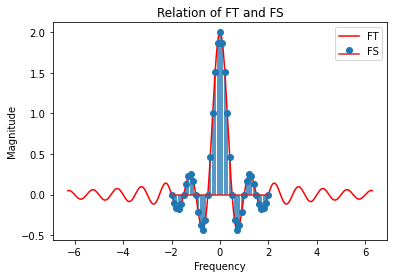

In [13]:
import sympy
from sympy import *
pi2 = 2 * np.pi
vx  = np.arange(-pi2, pi2, 0.001)
vy = np.zeros(len(vx))

for n in range(0,len(vx)):
    vy[n] = sympy.N(fs.subs(k, vx[n]))

# Plotting both the curves simultaneously
plt.plot(vx, vy, color='r', label='FT')
plt.stem(w/(2*np.pi), cn*T, use_line_collection = True, label='FS')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Relation of FT and FS")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

Οι τιμές cn πρέπει να πολλαπλασιαστούν με την περίοδο Τ για να ισούνται με την τιμή του μετασχηματισμού στη συγκεκριμένη συχνότητα. Επίσης ο οριζόντιος άξονας περιλαμβάνει τη συχνότητα f και όχι την κυκλική συχνότητα ω.

Αυτό γίνεται εύκολα αντιληπτό από τη σχέση που δίνει τους συντελεστές της σειράς Fourier ${c_n} = \frac{1}{{Τ}}\int\limits_{-Τ/2}^{Τ/2} {f\left( x \right){e^{ - \frac{{2in\pi x}}{Τ}}}dx}$ παλλαπλασιάζοντας και τα δύο μέλη επί την περίοδο Τ. Το ολοκλήρωμα συμπίπτει με αυτό του μετασχηματισμού, καθόσον η υπό εξέταση μη περιοδική συνάρτηση που μετασχηματίζεται κατά Fourier μηδενίζεται εκτός του διαστήματος της μιας περιόδου, οπότε τα άπειρα όρια του ολοκληρώματος μπορούν να συμπτιχθούν σε αυτά του ολοκληρώματος εντός της περιόδου.

Η αντιστοιχία αυτή θα φανεί ακόμη καλύτερα με τον ενιαίο τρόπο περιγραφής των σειρών και του μετασχηματιμού Fourier μέσω της συνάρτησης δέλτα του Dirac.

### Συνάρτηση Δέλτα του Dirac

Μέχρι στιγμής τα θεωρούμενα σήματα στο μετασχηματισμό Fourier ήταν σήματα ενέργειας, δηλαδή διέθεταν πεπερασμένη ενέργεια και ήταν τετραγωνικά ολοκληρώσιμα στο πεδίο του χρόνου. Το φάσμα που προκύπτει χαρακτηρίζεται για αυτό το λόγο ως φασματική πυκνότητα ενέργειας. 

Αντίθετα στις σειρές Fourier τα περιοδικά σήματα είναι σήματα με άπειρη ενέργεια και χαρακτηρίζονται ως σήματα ισχύος. Το διακριτό φάσμα περιγράφει την φασματική κατανομή της ισχύος. Είναι προφανές ότι τα σήματα αυτά δεν διαθέτουν μετασχηματισμό Fourier, καθόσον τα ολοκληρώματα απειρίζονται. 

Ωστόσο, είναι ιδιαίτερα χρήσιμη μια ενιαία αντιμετώπιση της φασματικής ανάλυσης, καθόσον τα αρμονικά σήματα είναι η βάση περιγραφής όλων των υπό εξέταση σημάτων. Την απαραίτητη μαθηματική γενίκευση παρέχει η θεωρία των γενικευμένων συναρτήσεων η κατανομών και συγκεκριμένα η συνάρτηση δέλτα του Dirac. Με τον τρόπο αυτό γίνεται η περιγραφή από το διακριτό πεδίο στο συνεχές και είναι δυνατή η περιγραφή των σειρών Fourier μέσω του μετασχηματισμού Fourier. 

Η συνάρτηση Δέλτα μπορεί να θεωρηθεί ως μια συνάρτηση η οποία είναι παντού μηδέν, εκτός από το 0, όπου απειρίζεται. Δηλαδή 

$$
{\displaystyle \delta (x)={\begin{cases}+\infty ,&x=0\\0,&x\neq 0\end{cases}}}
$$

Αυτό φυσικά δεν είναι μαθηματικά ορθό, γι αυτό ορίζεται αυστηρά ως γενικευμένη συνάρτηση. Η συνάρτηση ικανοποιεί τις βασικές σχέσεις:
    
$$
{\displaystyle \int _{-\infty }^{\infty }\delta (x) dx=1}
$$
$$
{\displaystyle \int _{-\infty }^{\infty }f(x)\delta (x)\,dx=f(0)}
$$

Το πακέτο συμβολικής άλγεβρας sympy περιλαμβάνει τις συναρτήσεις αυτές και μερικές απλές σχέσεις, αλλά δεν μπορεί να χρησιμοποιηθεί για υπολογισμούς ολκληρωμάτων του μετασχηματισμού με χρήση της συνάρτησης δέλτα.

In [25]:
from sympy import DiracDelta, Heaviside, diff, pi, exp
from sympy.abc import x,f,t,I
Heaviside(x).fdiff()

DiracDelta(x)

In [14]:
from sympy.integrals.deltafunctions import deltaintegrate
from sympy import sin, cos, tan, DiracDelta, Heaviside, oo
deltaintegrate(tan(x)*sin(x)*cos(x)*DiracDelta(x**2 - 1), x)

sin(1)*cos(1)*tan(1)*Heaviside(x - 1)/2 + sin(1)*cos(1)*tan(1)*Heaviside(x + 1)/2

In [5]:
Heaviside(x)

Heaviside(x)

In [7]:
from sympy import * 
integrate(tan(x)*sin(x)*cos(x)*DiracDelta(x**2 - 1), x)

sin(1)*cos(1)*tan(1)*Heaviside(x - 1)/2 + sin(1)*cos(1)*tan(1)*Heaviside(x + 1)/2

### Μετασχηματισμός Fourier και συνάρτηση Δέλτα

Με βάση τις ιδιότητες της συνάρτησης Δέλτα, προκύπτει ότι ο μετασχηματισμός της Fourier είναι ίσος με το μονάδα. 

$$
F(δ(x))(f)=\int_{-\infty}^{\infty}δ(t) e^{-i2\pi ft}dt=e^0=1
$$

Με χρήση του αντίστροφου μετασχηματισμού προκύπτει ότι

$$
F^{-1}(1)(x)=\int_{-\infty}^{\infty}e^{i2\pi ft}df=δ(t)
$$

Αλλά και λόγω του ότι η δέλτα είναι πραγματική και άρτια προκύπτει επίσης ότι

$$
F^{-1}(1)(x)=\int_{-\infty}^{\infty}cos(2\pi ft)df=δ(t)
$$

Λόγω συμμετρίας ως προς τις μεταβλητές χρόνου και συχνότητας ισχύει και ότι 

$$
\int_{-\infty}^{\infty}e^{i2\pi ft}dt=δ(f)
$$

και

$$
\int_{-\infty}^{\infty}cos(2\pi ft)dt=δ(f)
$$


Με χρήση της ιδιότητας μετατόπισης συχνότητας του μετασχηματισμού Fourier προκύπτει εύκολα ότι

$$
exp(i2\pi f_ct) \rightleftharpoons δ(f-f_c)
$$

In [26]:
integrate(exp(I*2*pi*f*t), (t,-oo, oo))

Piecewise((0, (Abs(arg(I) + arg(f)) < pi/2) & (Abs(arg(I) + arg(f) + pi) < pi/2)), (Integral(exp(2*pi*I*f*t), (t, -oo, oo)), True))

Για τη σχέση μεταξύ σειράς και μετασχηματισμού Fourier με χρήση της συνάρτησης δέλτα θεωρούμε ένα περιοδικό σήμα $g_{T_0}$ με περίοδο $Τ_{0}$ και θεμελιώδη συχνότητα $f_0=1/T_0$ το οποίο αναπαρίσταται μέσω της μιγαδικής εκθετικής σειράς Fourier ως

$$
g_{T_0}(t) = \sum\limits_{n =  - \infty }^\infty  {{c_n}{e^{i2\pi n f_0 t}}} 
$$

με τους μιγαδικούς συντελεστές Fourier να δίνονται ως γνωστό από τη σχέση

$$
{c_n} = \frac{1}{{T_0}}\int\limits_{-T_0/2}^{T_0/2} {g_{T_0}\left( t \right){e^{ - i2\pi n f_0 t}}dt} 
$$

Θεωρούμε επίσης τη συνάρτηση g(t) η οποία ισούται με τη $g_{T_0}$ στο διάστημα της μιας περιόδου και μηδενίζεται οπουδήποτε αλλού, δηλαδή

$$
g(t) =
\left\{
	\begin{array}{ll}
		g_{T_0}(t)  & \mbox{if } |t| \leq T_0/2 \\
		0 & \mbox{if } |t| > T_0/2
	\end{array}
\right.
$$

Το περιοδικό σήμα μπορεί να εκφραστεί μέσω της g(t) ως ένα άπειρο άθροισμα
$$
g_{T_0}(t) = \sum\limits_{m =  - \infty }^\infty  {g(t-mT_0)} 
$$

Ο μετασχηματισμός Fourier G(f) της g(t) υπάρχει και μέσω αυτού μπορεί να γραφεί ο τύπος για τους μιγαδικούς συντελεστές της σειράς Fourier όπως παρακάτω:

$$
{c_n} = f_0\int\limits_{-\infty}^{\infty} {g(t)e^{ - i2\pi (n f_0) t}dt} = f_0G(nf_0)
$$

Από την παραπάνω σχέση προκύπτει ακόμη πιο καθαρά ότι οι μιγαδικοί συντελεστές Fourier πολλαπλασιασμένοι με την περίοδο Τ0 ισούνται με τις τιμές του μετασχηματισμού στα σημεία nf0.

Ο τύπος που δίνει το περιοδικό σήμα ως άπειρο άθροισμα μιγαδικών εκθετικων συναρτήσεων μπορεί να ξαναγραφεί

$$
g_{T_0}(t) = f_0\sum\limits_{n =  - \infty }^\infty  {G(nf_0)e^{i2\pi n f_0 t}} 
$$

ή ισοδύναμα ως 
$$
\sum\limits_{m =  - \infty }^\infty  {g(t-mT_0)} = f_0\sum\limits_{n =  - \infty }^\infty  {G(nf_0)e^{i2\pi n f_0 t}} 
$$
η οποία είναι μια μορφή του αθροίσματος Poisson.

Λαμβάνοντας υπόψη ότι ο μετασχηματισμός Fourier της μιγαδικής εκθετικής συνάρτησης δίνεται από $exp(i2\pi f_ct) \rightleftharpoons δ(f-f_c)$ ισχύει επίσης το ακόλουθο ζευγάρι μετασχηματισμού Fourier για το περιοδικό σήμα με γεννήτρια συνάρτηση τη συνάρτηση g(t) και περίοδο Τ0.

$$
\sum\limits_{m =  - \infty }^\infty  {g(t-mT_0)} \rightleftharpoons f_0\sum\limits_{n =  - \infty }^\infty  {G(nf_0)δ(f-f_c)}
$$

### Συνάρτηση δειγματοληψίας

Η ιδανική συνάρτηση δειγματοληψίας ή χτένι Dirac αποτελείται από μια άπειρη ακολουθία ισαπεχουσών συναρτήσεων δέλτα ανά Τ0. Ως περιοδική με περίοδο Τ0 και δεδομένου ότι ο μετασχηματισμός Fourier της γεννήτριας συνάρτησης δ(f) είναι 1, προκύπτει ότι G(nf0)=1 για όλα τα n και επομένως ισχύει

$$
\sum\limits_{m =  - \infty }^\infty  {δ(t-mT_0)} = f_0\sum\limits_{n =  - \infty }^\infty e^ {i2\pi n f_0 t} 
$$

η οποία με ανάλυση της μιγαδικής εκθετικής σύμφωνα με τον τύπο του Euler είναι ισοδύναμη με 
$$
\sum\limits_{m =  - \infty }^\infty  {δ(t-mT_0)} = f_0 (1+\sum_{n=1}^\infty2\cos(2\pi nt/T))
$$

και
$$
\sum\limits_{m =  - \infty }^\infty  {δ(t-mT_0)} \rightleftharpoons f_0\sum\limits_{n =  - \infty }^\infty  {δ(f-nf_0)}
$$


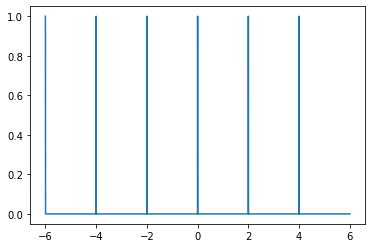

In [3]:
import numpy as np
import matplotlib.pyplot as plt
T = 2                      # time distance between pulses
Fs = 1000                  # sampling frequency, used for discretizing the system
t = np.arange(-6, 6, 1/Fs) # time range to consider
comb = np.zeros_like(t)
comb[::int(Fs*T)] = 1     # Comb becomes T every T*Fs samples
plt.plot(t, comb)

Στην παραπάνω γραφική παράσταση η πλαμοσειρά δέλτα έχει παρασταθεί με τη συνάρτηση δέλτα του Kronecker που είναι η διακριτή αντίστοιχη της συνάρτησης δέλτα του Dirac με τιμή 1 στο 0 και 0 οπουδήποτε αλλού.
Η προσέγγιση της παλμοσειράς δέλτα με άπειρο άθροισμα μιγαδικών εκθετικών φαίνεται παρακάτω: 

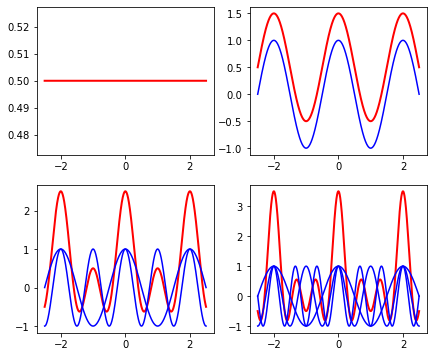

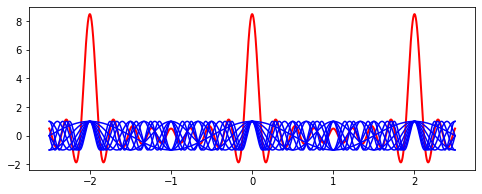

In [4]:
T = 2  # time-distance between diracs
Fs = 10000 # sampling frequency
def combApprox(N):
    t = np.arange(-2.5, 2.5, 1/Fs)
    f_0 = 1/T
    sigSum = f_0*np.ones_like(t)
    for n in range(1,N+1):
        part = f_0*2*np.cos(2*np.pi*n*t/T)
        sigSum = sigSum + part
        if n < 50:
            plt.plot(t, part, 'b-')
    plt.plot(t, sigSum, 'r-', lw=2, zorder=-1)
    

plt.figure(figsize=(7,6))
plt.subplot(221); combApprox(0)
plt.subplot(222); combApprox(1)
plt.subplot(223); combApprox(2)
plt.subplot(224); combApprox(3)

plt.figure(figsize=(8,3)); combApprox(8)

Εδώ η προσέγγιση δίνει παλμούς που σταδιακά θα απειρίζονται, όπως η συνάρτηση δέλτα του Dirac.

### Μετασχηματισμός Fourier Διακριτού χρόνου DTFT

Στις σειρές Fourier μια περιοδική συνάρτηση του χρόνου με περίοδο Τ, εκφράζεται σε ένα αριθμήσιμο (διακριτό) άθροισμα τριγωνομετρικών συναρτήσεων με συχνότητες ακέραια πολλαπλάσια της θεμελιώδους συχνότητας $f_0=1/T$.Δηλαδή αναπαριστάται με ένα διακριτό φάσμα. 

Σκεφτόμενοι αντίστροφα μια περιοδική συνάρτηση στη γωνιακή συχνότητα ω με περίοδο Ω=2π (άρα και περιοδική στη συχνότητα f με περίοδο F=Ω/2π), θα μπορεί να εκφραστεί ως άπειρο άθροισμα μιγαδικών εκθετικών συναρτήσεων. Ωστόσο η θεμελιώδης "συχνότητα" στην περίπτωση αυτή θα είναι το χρονικό διάστημα Δt μεταξύ των δειγμάτων (Δt=1/F=2π/Ω). 

Ορίζεται ο διακριτός μετασχηματισμός Fourier ως.  

Δηλαδή
$$
Χ(ω) = \sum\limits_{n =  - \infty }^\infty  {{x_n}{e^{-iωn}}} , \\
{x_n} = \frac{1}{{2\pi}}\int\limits_{-\pi}^{\pi} {X\left( ω \right){e^{iωn}}}dω 
$$

Το φάσμα είναι η περιοδική συνάρτηση και οι διακριτές τιμές της συνάρτησης δίνονται από τη σχέση που δίνει τους συντελεστές Fourier. Εδώ είναι ο αντίστροφος μετασχηματισμός Fourier. Όπως αναφέρθηκε το φάσμα είναι περιοδικό στη συχνότητα με περίοδο 2π. 

### Διακριτός Μετασχηματισμός Fourier DFT

Το επόμενο βήμα είναι η θεώρηση ενός διακριτού περιοδικού σήματος. Η περιοδικότητα μπορεί να θεωρηθεί υποθετικά παίρνοντας μόνο ένα τμήμα του σήματος αποτελούμενο από Ν σημεία. Αυτό είναι το κατάλληλο πλαίσιο για την αναπαράσταση στη συχνότητα ψηφιακών σημάτων και ιδιαίτερα για την επεξεργασία τους από υπολογιστή, όπου λόγω μνήμης μόνο ένας αριθμός από σημεία δειγματοληψίας του σήματος μπορεί να υπολογισθεί κάθε φορά. Έτσι ένα σύνολο Ν σημείων στο πεδίο του χρόνου μετασχηματίζεται σε ένα σύνολο Ν σημείων στο πεδίο της συχνότητας.

$$
X_{k}=\sum _{n=0}^{N-1}x_{n}\cdot e^{-{\frac {i2\pi }{N}}kn}
$$

$$
x_{n}={\frac {1}{N}}\sum _{k=0}^{N-1}X_{k}\cdot e^{i{\frac {2\pi }{N}}kn}
$$

Due to the nature of the transform, X0=∑N−1n=0xn. If N is an odd number, the elements X1,X2,...,X(N−1)/2 contain the positive frequency terms and the elements X(N+1)/2,...,XN−1 contain the negative frequency terms, in order of decreasingly negative frequency. While if N is even, the elements X1,X2,...,XN/2−1 contain the positive frequency terms, and the elements XN/2,...,XN−1 contain the negative frequency terms, in order of decreasingly negative frequency. In the case that our input signal x is a real-valued sequence, the DFT output Xn for positive frequencies is the conjugate of the values Xn for negative frequencies, the spectrum will be symmetric. Therefore, usually we only plot the DFT corresponding to the positive frequencies.

The amplitudes returned by DFT equal to the amplitudes of the signals fed into the DFT if we normalize it by the number of sample points. Note that doing this will divide the power between the positive and negative sides, if the input signal is real-valued sequence as we described above, the spectrum of the positive and negative frequencies will be symmetric, therefore, we will only look at one side of the DFT result, and instead of divide N, we divide N/2 to get the amplitude corresponding to the time domain signal.

Generate 3 sine waves with frequencies 1 Hz, 4 Hz, and 7 Hz, amplitudes 3, 1 and 0.5, and phase all zeros. Add this 3 sine waves together with a sampling rate 100 Hz, you will see that it is the same signal we just shown at the beginning of the section.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [ ]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

In [ ]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

In [ ]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

The main issue with the above DFT implementation is that it is not efficient if we have a signal with many data points. It may take a long time to compute the DFT if the signal is large.

TRY IT Write a function to generate a simple signal with different sampling rate, and see the difference of computing time by varying the sampling rate.

In [ ]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [ ]:
# sampling rate =2000
sr = 2000
%timeit DFT(gen_sig(sr))

In [ ]:
# sampling rate 20000
sr = 20000
%timeit DFT(gen_sig(sr))

We can see that, with the number of data points increasing, we can use a lot of computation time with this DFT. Luckily, the Fast Fourier Transform (FFT) was popularized by Cooley and Tukey in their 1965 paper that solve this problem efficiently, which will be the topic for the next section.

Fast Fourier Transform (FFT)¶
The Fast Fourier Transform (FFT) is an efficient algorithm to calculate the DFT of a sequence. It is described first in Cooley and Tukey’s classic paper in 1965, but the idea actually can be traced back to Gauss’s unpublished work in 1805. It is a divide and conquer algorithm that recursively breaks the DFT into smaller DFTs to bring down the computation. As a result, it successfully reduces the complexity of the DFT from O(n2) to O(nlogn), where n is the size of the data. This reduction in computation time is significant especially for data with large N, therefore, making FFT widely used in engineering, science and mathematics. The FFT algorithm is the Top 10 algorithm of 20th century by the journal Computing in Science & Engineering.

In this section, we will introduce you how does the FFT reduces the computation time. The content of this section is heavily based on this great tutorial put together by Jake VanderPlas.

Symmetries in the DFT¶
The answer to how FFT speedup the computing of DFT lies in the exploitation of the symmetries in the DFT. Let’s take a look of the symmetries in the DFT. From the definition of the DFT equation

$$
X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}}
$$

we can calculate the
$$
X_{k+N} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{(k+N)n/N}}} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{n}}\cdot e^{-i2\pi{kn/N}}}
$$

Παρατηρώντας ότι $e^{-i2\pi{n}} = 1$ προκύπτει ότι

$$
X_{k+N} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} = X_k
$$

και επεκτείνοντας παραπέρα

$$
X_{k+i\cdot N} = X_k, \text{ for any integer i}
$$

This means that within the DFT, we clearly have some symmetries that we can use to reduce the computation.

Tricks in FFT¶
Since we know there are symmetries in the DFT, we can consider to use it reduce the computation, because if we need to calculate both Xk and Xk+N, we only need to do this once. This is exactly the idea behind the FFT. Cooley and Tukey showed that we can calculate DFT more efficiently if we continue to divide the problem into smaller ones. Let’s first divide the whole series into two parts, i.e. the even number part and the odd number part:

$$
\begin{eqnarray*}
X_{k} &=& \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} \\
      &=& \sum_{m=0}^{N/2-1}{x_{2m}\cdot e^{-i2\pi{k(2m)/N}}} + \sum_{m=0}^{N/2-1}{x_{2m+1}\cdot e^{-i2\pi{k(2m+1)/N}}} \\
      &=& \sum_{m=0}^{N/2-1}{x_{2m}\cdot e^{-i2\pi{km/(N/2)}}} + e^{-i2\pi{k/N}}\sum_{m=0}^{N/2-1}{x_{2m+1}\cdot e^{-i2\pi{km/(N/2)}}}
\end{eqnarray*}
$$

We can see that, the two smaller terms which only have half of the size (N2) in the above equation are two smaller DFTs. For each term, the 0≤m≤N2, but 0≤k≤N, therefore, we can see that half of the values will be the same due to the symmetry properties we described above. Thus, we only need to calculate half of the fields in each term. Of course, we don’t need to stop here, we can continue to divide each term into half with the even and odd values until it reaches the last two numbers, then calculation will be really simple.

This is how FFT works using this recursive approach. Let’s see a quick and dirty implementation of the FFT. Note that, the input signal to FFT should have a length of power of 2. If the length is not, usually we need to fill up zeros to the next power of 2 size.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

In [ ]:
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

In [ ]:
# sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

TRY IT! Use the FFT function to calculate the Fourier transform of the above signal. Plot the amplitude spectrum for both the two-sided and one-side frequencies.

In [ ]:
X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

In [ ]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [ ]:
# sampling rate =2048
sr = 2048
%timeit FFT(gen_sig(sr))

We can see that, for a signal with length 2048 (about 2000), this implementation of FFT uses 16.9 ms instead of 120 ms using DFT. Note that, there are also a lot of ways to optimize the FFT implementation which will make it faster. In the next section, we will take a look of the Python built-in FFT functions, which will be much faster.

### FFT in Python¶
In Python, there are very mature FFT functions both in numpy and scipy. In this section, we will take a look of both packages and see how we can easily use them in our work. Let’s first generate the signal as before.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

In [ ]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

#### FFT in Numpy¶
EXAMPLE: Use fft and ifft function from numpy to calculate the FFT amplitude spectrum and inverse FFT to obtain the original signal. Plot both results. Time the fft function using this 2000 length signal.

In [ ]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [ ]:
%timeit fft(x)

#### FFT in Scipy¶
EXAMPLE: Use fft and ifft function from scipy to calculate the FFT amplitude spectrum and inverse FFT to obtain the original signal. Plot both results. Time the fft function using this 2000 length signal.

In [ ]:
from scipy.fftpack import fft, ifft

X = fft(x)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [ ]:
%timeit fft(x)

Now we can see that the built-in fft functions are much faster and easy to use, especially for the scipy version. Here is the results for comparison:

Implemented DFT: ~120 ms

Implemented FFT: ~16 ms

Numpy FFT: ~40 µs

Scipy FFT: ~12 µs